## **Task 1 (P Task) Road Sign Classification using Deep Learning**

### Task 1.1 Define a problem

The image classification problem we aim to solve is the identification of four key road signs commonly encountered in residential areas:

1. Give Way
2. Keep Left
3. Roundabout
4. Speed Bump Ahead

This classification task will assist autonomous vehicles in navigating residential areas safely by recognizing and responding to these critical signs.

#### Inputs and Outputs

* Inputs: Images captured from the vehicle's cameras, likely in various lighting conditions and angles.
* Outputs: Classification of the image into one of the four sign categories, along with bounding box coordinates for the sign's location in the image.

#### Anticipated Challenges

1. Variation in lighting conditions (day/night, sunny/cloudy)
2. Partial occlusion of signs by objects or vegetation
3. Varying angles and distances from which signs are viewed
4. Potential for sign wear or damage affecting recognition
5. Dealing with multiple signs in a single image
6. Ensuring the model generalizes well to signs it hasn't seen during training
7. Balancing the dataset, as we have slightly uneven numbers of images per class
8. Achieving real-time performance for use in a moving vehicle

### Task 1.2: Plan
#### Dataset
We have created our own dataset by recording videos and converting them to frames. This approach ensures that our data is representative of the specific conditions our model will encounter in real-world applications.

#### Image Counts

* Give Way: 185 images
* Keep Left: 167 images
* Roundabout: 117 images
* Speed Bump: 100 images

* Total: 569 images

#### Data Split
Given the relatively small size of our dataset, we will use the following split:

* Training: 80% (455 images)
* Validation: 10% (57 images)
* Testing: 10% (57 images)

To address the limitations of our small dataset, we will:

1. Implement data augmentation techniques to artificially increase the dataset size
2. Employ transfer learning from a model pre-trained on a larger dataset

#### Labeling
We have already labeled the images and created CSV files with bounding box information, which is suitable for training object detection models.

#### Success Criteria
To determine if our model is good enough, we have set the following criteria:

1. Overall accuracy on the test set > 90%
2. Per-class accuracy > 85%
3. Mean Average Precision (mAP) > 0.85
4. Fast inference time (< 100ms per image) for real-time application
5. Robustness to various lighting conditions and partial occlusions



In [6]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split

# Define paths
base_path = '/Users/ravishankar/Library/CloudStorage/OneDrive-DeakinUniversity/Deakin/Trimester_4/SIT744/Assignment_2/dataset'
output_path = '/Users/ravishankar/Library/CloudStorage/OneDrive-DeakinUniversity/Deakin/Trimester_4/SIT744/Assignment_2/output'

# Create output directories
for split in ['train', 'test']:
    for class_name in ['give_way', 'keepleft', 'roundabout', 'speed_bump']:
        os.makedirs(os.path.join(output_path, split, class_name), exist_ok=True)

# Function to process each class
def process_class(class_name):
    # Read CSV file
    csv_path = os.path.join(base_path, f'labels_{class_name}.csv')
    df = pd.read_csv(csv_path)
    
    # Get image paths
    image_paths = [os.path.join(base_path, class_name, row['image_name']) for _, row in df.iterrows()]
    
    # Split data
    train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)
    
    # Copy images to respective folders
    for path in train_paths:
        shutil.copy(path, os.path.join(output_path, 'train', class_name))
    for path in test_paths:
        shutil.copy(path, os.path.join(output_path, 'test', class_name))
    
    return len(train_paths), len(test_paths)

# Process each class
for class_name in ['give_way', 'keepleft', 'roundabout', 'speed_bump']:
    train_count, test_count = process_class(class_name)
    print(f"{class_name}: {train_count} train, {test_count} test")

print("Data preparation completed.")

give_way: 148 train, 37 test
keepleft: 133 train, 34 test
roundabout: 93 train, 24 test
speed_bump: 80 train, 20 test
Data preparation completed.


## Without Augmentation

Found 454 images belonging to 4 classes.
Found 115 images belonging to 4 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  def workers(self):


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 107s 8s/step - accuracy: 0.3318 - loss: 1.3316 - val_accuracy: 0.6771 - val_loss: 0.7423
Epoch 2/20
 1/14 ━━━━━━━━━━━━━━━━━━━━ 4s 358ms/step - accuracy: 0.6875 - loss: 0.8358

/opt/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.6875 - loss: 0.8358 - val_accuracy: 0.8947 - val_loss: 0.6725
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 95s 7s/step - accuracy: 0.8569 - loss: 0.4963 - val_accuracy: 0.9792 - val_loss: 0.1128
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.8438 - loss: 0.3171 - val_accuracy: 0.9474 - val_loss: 0.1390
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 98s 7s/step - accuracy: 0.9590 - loss: 0.1350 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 1.0000 - loss: 0.0506 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - accuracy: 0.9888 - loss: 0.0458 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.9375 - loss: 0.1311 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - accuracy: 0.9936 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 4.

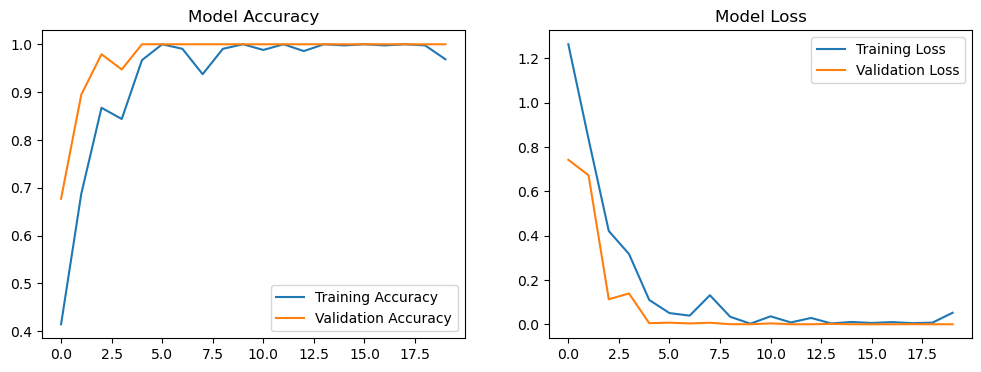

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define paths
train_dir = './output/train'
test_dir = './output/test'

# Image parameters
img_height = 224
img_width = 224
batch_size = 32

# Data Preprocessing without Augmentation
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Save the model
model.save('road_sign_classifier_no_augmentation.h5')

## With Augmentation

Found 454 images belonging to 4 classes.
Found 115 images belonging to 4 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  def workers(self):


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 113s 8s/step - accuracy: 0.2277 - loss: 1.4636 - val_accuracy: 0.3021 - val_loss: 1.3264
Epoch 2/20
 1/14 ━━━━━━━━━━━━━━━━━━━━ 5s 444ms/step - accuracy: 0.4062 - loss: 1.3356

/opt/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.4062 - loss: 1.3356 - val_accuracy: 0.4211 - val_loss: 1.3147
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - accuracy: 0.3862 - loss: 1.3175 - val_accuracy: 0.6667 - val_loss: 0.9105
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.6875 - loss: 0.8779 - val_accuracy: 0.6316 - val_loss: 1.0430
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - accuracy: 0.5517 - loss: 0.9996 - val_accuracy: 0.6667 - val_loss: 0.7823
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.7500 - loss: 0.8137 - val_accuracy: 0.8421 - val_loss: 0.7471
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - accuracy: 0.6566 - loss: 0.8164 - val_accuracy: 0.8021 - val_loss: 0.5273
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.6562 - loss: 0.7195 - val_accuracy: 0.8421 - val_loss: 0.5669
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - accuracy: 0.7149 - loss: 0.6532 - val_accuracy: 0.8958 - val_loss: 0.

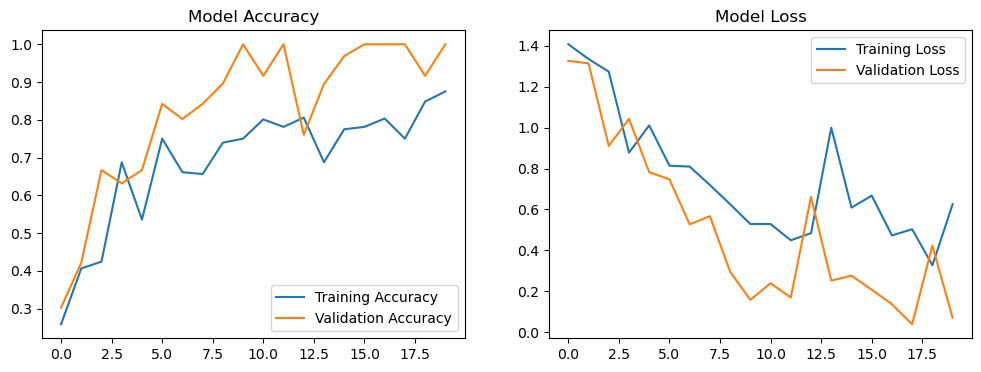

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define paths
train_dir = '/Users/ravishankar/Library/CloudStorage/OneDrive-DeakinUniversity/Deakin/Trimester_4/SIT744/Assignment_2/output/train'
test_dir = '/Users/ravishankar/Library/CloudStorage/OneDrive-DeakinUniversity/Deakin/Trimester_4/SIT744/Assignment_2/output/test'

# Image parameters
img_height = 224
img_width = 224
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Save the model
model.save('road_sign_classifier.h5')

### C V2

Training model with augmentation:
Found 454 images belonging to 4 classes.
Found 115 images belonging to 4 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step - accuracy: 0.3010 - loss: 1.4368 - val_accuracy: 0.3125 - val_loss: 1.3012
Epoch 2/10
 1/14 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 0.5000 - loss: 1.2750

/opt/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.5000 - loss: 1.2750 - val_accuracy: 0.3684 - val_loss: 1.3283
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.4902 - loss: 1.2854 - val_accuracy: 0.6146 - val_loss: 1.0008
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.6250 - loss: 1.0988 - val_accuracy: 0.6316 - val_loss: 0.9217
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.5848 - loss: 1.0109 - val_accuracy: 0.6979 - val_loss: 0.8200
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.5625 - loss: 0.9447 - val_accuracy: 0.5789 - val_loss: 0.9255
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.6028 - loss: 0.9326 - val_accuracy: 0.8021 - val_loss: 0.5712
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.6562 - loss: 0.8352 - val_accuracy: 0.5789 - val_loss: 0.8427
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.6722 - loss: 0.7350 - val_accuracy: 0.6875 - val_loss

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.3760 - loss: 1.3681 - val_accuracy: 0.6354 - val_loss: 0.8421
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.6562 - loss: 0.8572 - val_accuracy: 0.6842 - val_loss: 0.8107
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.7261 - loss: 0.7143 - val_accuracy: 0.8438 - val_loss: 0.3050
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.8750 - loss: 0.3042 - val_accuracy: 0.9474 - val_loss: 0.1458
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - accuracy: 0.8650 - loss: 0.3086 - val_accuracy: 1.0000 - val_loss: 0.0605
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 262ms/step - accuracy: 1.0000 - loss: 0.1175 - val_accuracy: 1.0000 - val_loss: 0.0260
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.9542 - loss: 0.1312 - val_accuracy: 0.9896 - val_loss: 0.0436
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.9688 - loss: 0.1068 - val_accuracy: 1.0000

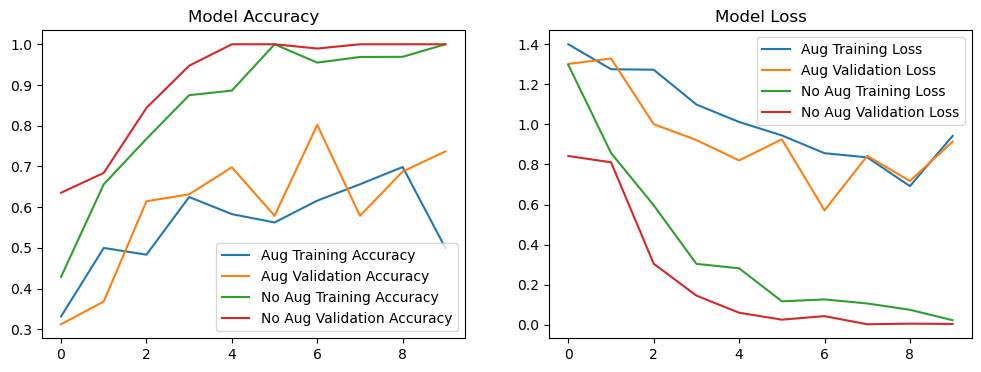


Analyzing misclassifications for augmented model:
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step
Number of misclassified images: 86

Analyzing misclassifications for non-augmented model:
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step
Number of misclassified images: 91


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import time
import numpy as np

# Start TensorFlow Profiler for performance analysis
tf.profiler.experimental.start('logdir')

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define paths to the dataset
train_dir = '/Users/ravishankar/Library/CloudStorage/OneDrive-DeakinUniversity/Deakin/Trimester_4/SIT744/Assignment_2/output/train'
test_dir = '/Users/ravishankar/Library/CloudStorage/OneDrive-DeakinUniversity/Deakin/Trimester_4/SIT744/Assignment_2/output/test'

# Set image and batch parameters
img_height = 224
img_width = 224
batch_size = 32

# Function to create and train a model
def create_and_train_model(use_augmentation, max_time=600):  # max_time in seconds
    # Define data generators with or without augmentation
    if use_augmentation:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
    else:
        train_datagen = ImageDataGenerator(rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    # Create data generators for training and testing
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Define the model architecture
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')  # Adjust the number of classes as needed
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model with a time limit
    start_time = time.time()
    history = tf.keras.callbacks.History()
    try:
        model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=10,  # High number of epochs, will stop based on time
            validation_data=test_generator,
            validation_steps=test_generator.samples // batch_size,
            callbacks=[
                history,
                tf.keras.callbacks.LambdaCallback(
                    on_epoch_end=lambda epoch, logs: exec('raise StopIteration') if time.time() - start_time > max_time else None
                )
            ]
        )
    except StopIteration:
        print(f"Training stopped after {time.time() - start_time:.2f} seconds")

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
    print(f'Test accuracy: {test_acc:.4f}')

    return model, history, test_acc, test_generator

# Train models with and without data augmentation
print("Training model with augmentation:")
model_aug, history_aug, acc_aug, test_generator_aug = create_and_train_model(use_augmentation=True)
print("\nTraining model without augmentation:")
model_no_aug, history_no_aug, acc_no_aug, test_generator_no_aug = create_and_train_model(use_augmentation=False)

# Compare model accuracies
print(f'\nAccuracy with augmentation: {acc_aug:.4f}')
print(f'Accuracy without augmentation: {acc_no_aug:.4f}')

# Plot training history for comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Aug Training Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Aug Validation Accuracy')
plt.plot(history_no_aug.history['accuracy'], label='No Aug Training Accuracy')
plt.plot(history_no_aug.history['val_accuracy'], label='No Aug Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Aug Training Loss')
plt.plot(history_aug.history['val_loss'], label='Aug Validation Loss')
plt.plot(history_no_aug.history['loss'], label='No Aug Training Loss')
plt.plot(history_no_aug.history['val_loss'], label='No Aug Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Function to analyze model misclassifications
def analyze_misclassifications(model, data_generator):
    predictions = model.predict(data_generator)
    true_labels = data_generator.classes
    predicted_labels = np.argmax(predictions, axis=1)
    
    misclassified_indices = np.where(predicted_labels != true_labels)[0]
    
    print(f"Number of misclassified images: {len(misclassified_indices)}")
    
    # TODO: Add code to load and display some misclassified images
    # This depends on the specific data structure and may require additional code

# Analyze misclassifications for both models
print("\nAnalyzing misclassifications for augmented model:")
analyze_misclassifications(model_aug, test_generator_aug)
print("\nAnalyzing misclassifications for non-augmented model:")
analyze_misclassifications(model_no_aug, test_generator_no_aug)

# Stop TensorFlow Profiler
tf.profiler.experimental.stop()

# Additional steps for comprehensive analysis:
# 1. Review the TensorFlow Profiler output to identify performance bottlenecks
# 2. Compare the performance of augmented and non-augmented models
# 3. Extend the analyze_misclassifications function to visualize misclassified images
# 4. Analyze characteristics of misclassified images to identify potential improvements